In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
df = pd.read_csv('/Users/gouridumale/Downloads/output_gsec10_1.csv')


In [3]:
# Renaming columns based on the image provided
column_renaming = {
    'hhid': 'household_id',
    'h10_respondent': 'respondent',
    's10q01': 'has_grid_electricity',
    's10q02': 'hours_of_power_per_day',
    's10q03': 'electricity_payment_method',
    's10q05a': 'electricity_cost_last_month',
    's10q05b': 'electricity_cost_days_covered',
    's10q05c': 'reason_no_grid_electricity',
    's10q06': 'uses_generator',
    's10q07a': 'generator_fuel_cost_last_month',
    's10q07b': 'generator_fuel_amount_last_month',
    's10q08a': 'stove_electric',
    's10q08b': 'stove_lpg',
    's10q08c': 'stove_kerosene',
    's10q08d': 'stove_wood_sawdust',
    's10q08e': 'stove_efficient_wood',
    's10q08f': 'stove_charcoal',
    's10q08g': 'stove_other_biomass',
    's10q08h': 'stove_open_fire',
    's10q08x': 'stove_other_specify',
    's10q08z': 'stove_none',
    's10q09': 'main_stove_type',
    's10q10': 'main_stove_has_chimney',
    's10q11': 'main_stove_hours_per_day',
    's10q12': 'main_stove_location'
}

# Applying new names 
df.rename(columns=column_renaming, inplace=True)

# Showing the first few rows to confirm renaming
df.head()

,household_id,respondent,has_grid_electricity,hours_of_power_per_day,electricity_payment_method,s10q04,electricity_cost_last_month,electricity_cost_days_covered,reason_no_grid_electricity,uses_generator,...,stove_charcoal,stove_other_biomass,stove_open_fire,stove_other_specify,stove_none,main_stove_type,main_stove_has_chimney,main_stove_hours_per_day,main_stove_location,year
0,00858c2384184dc3bfc800550a6c8cb5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,...,NaN,NaN,1.0,NaN,NaN,8.0,2.0,7.0,1.0,2018
1,0192be21a93d4c2d83997fb6dc1c3ea6,1.0,2.0,NaN,NaN,NaN,NaN,NaN,4.0,2.0,...,1.0,NaN,NaN,NaN,NaN,6.0,2.0,5.0,2.0,2018
2,01483c3751964ad2842b6e4a8b6edcdd,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,...,NaN,NaN,1.0,NaN,NaN,8.0,2.0,3.0,1.0,2018
3,039a11571b874a88b7a6c200469fe4f3,-999999999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
4,037866653c7c4cb99a80f05a38cdafb2,-999999999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [4]:
# Selecting only the electricity-related columns
electricity_columns = [
    'has_grid_electricity',
    'hours_of_power_per_day',
    'electricity_payment_method',
    'electricity_cost_last_month',
    'electricity_cost_days_covered',
    'reason_no_grid_electricity',
    'uses_generator',
    'generator_fuel_cost_last_month',
    'generator_fuel_amount_last_month'
]

# Subset and checking for missing values
electricity_df = df[electricity_columns]
electricity_nulls = electricity_df.isnull().sum().reset_index()
electricity_nulls.columns = ['Column', 'Missing_Values']

# Displaying result
print(electricity_nulls)

                             Column  Missing_Values
0              has_grid_electricity              61
1            hours_of_power_per_day            5270
2        electricity_payment_method            5270
3       electricity_cost_last_month            5449
4     electricity_cost_days_covered            5449
5        reason_no_grid_electricity            1100
6                    uses_generator              62
7    generator_fuel_cost_last_month            6300
8  generator_fuel_amount_last_month            6300


In [5]:
# Defining binary Yes/No columns 
binary_columns = [
    'has_grid_electricity',
    'uses_generator',
    'main_stove_has_chimney'
]

# Optionally inspecting unique values before mapping (to confirm they are 1/2 or Yes/No)
for col in binary_columns:
    print(f"{col} unique values: {df[col].unique()}")

# If values are 1/2, mapping them to 1 (Yes), 0 (No)
# For instance: 1 = Yes, 2 = No → Mapping as: 1 -> 1, 2 -> 0
df[binary_columns] = df[binary_columns].replace({1: 1, 2: 0})

# Checking the result
df[binary_columns].head()


# Showing the updated values
df[binary_columns].head()


has_grid_electricity unique values: [ 2. nan  1.]
uses_generator unique values: [ 2. nan  1.]
main_stove_has_chimney unique values: [ 2. nan  1.]


,has_grid_electricity,uses_generator,main_stove_has_chimney
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [6]:
#cleaning hours_of_power_per_day
#Description: How many hours per day household usually has electricity.
#Expected: 0 to 24 hours.
#Needs Cleaning?  Yes, filtering out values > 24 or < 0.
#Extra: Only makes sense if has_grid_electricity = 1.

    
    
    
# Step 1: Removing entries where hours are less than 0 or greater than 24
df_cleaned = df[
    (df['hours_of_power_per_day'].isnull()) |
    ((df['hours_of_power_per_day'] >= 0) & (df['hours_of_power_per_day'] <= 24))
]

# Step 2: Ensuring hours are only filled if household has grid electricity (has_grid_electricity = 1)
# Seting to NaN if grid electricity is not available
df_cleaned.loc[df_cleaned['has_grid_electricity'] == 0, 'hours_of_power_per_day'] = pd.NA

# Displaying the cleaned column
df_cleaned[['has_grid_electricity', 'hours_of_power_per_day']].head(10)




,has_grid_electricity,hours_of_power_per_day
0,0.0,NaN
1,0.0,NaN
2,0.0,NaN
3,NaN,NaN
4,NaN,NaN
5,0.0,NaN
6,0.0,NaN
7,0.0,NaN
8,0.0,NaN
9,0.0,NaN


In [7]:
#cleaning electricity_payment_method
#Description: How household pays for electricity.
#Expected: Categorical values (e.g., 1 = prepaid, 2 = postpaid, etc.)
#Needs Cleaning?  Possibly.
#Extra: Should be NaN if no grid access. So missing values here are logical.

# Step 1: Seting electricity_payment_method to NaN if household does not have grid electricity
df_cleaned.loc[df_cleaned['has_grid_electricity'] == 0, 'electricity_payment_method'] = pd.NA

# Step 2: Checking unique values for valid categories (to inspect for cleaning)
payment_method_unique_values = df_cleaned['electricity_payment_method'].dropna().unique()

# Show unique values to assess validity
payment_method_unique_values


#These look like coded categorical values, likely representing options such as:

# 1 = Prepaid
# 2 = Postpaid
# 3 = Shared Meter
# 4 = Community Connection
# 5 = Included in Rent
# 8 = Other


array([2., 3., 5., 4., 1., 8.])

In [8]:
#cleaning electricity_cost_last_month

#Description: Amount paid for electricity (in Shillings).
#Expected: Positive numeric values.
#Needs Cleaning?  Yes:
#Filter out negatives or zeros if they don’t make sense.
#Missing values logical for non-grid users.

# Step 1: Setting electricity cost to NaN for households without grid access
df_cleaned.loc[df_cleaned['has_grid_electricity'] == 0, 'electricity_cost_last_month'] = pd.NA

# Step 2: Removing entries where cost is negative
df_cleaned = df_cleaned[
    (df_cleaned['electricity_cost_last_month'].isnull()) |
    (df_cleaned['electricity_cost_last_month'] > 0)
]

# Showing a sample of the cleaned column
df_cleaned[['has_grid_electricity', 'electricity_cost_last_month']].head(10)

#Setting to NaN for households that do not have grid electricity.
#Removed entries where the cost was ≤ 0, since these are either invalid or nonsensical for electricity expenses.



,has_grid_electricity,electricity_cost_last_month
0,0.0,NaN
1,0.0,NaN
2,0.0,NaN
3,NaN,NaN
4,NaN,NaN
5,0.0,NaN
6,0.0,NaN
7,0.0,NaN
8,0.0,NaN
9,0.0,NaN


In [9]:
#cleaning electricity_cost_days_covered

#Description: Number of days that the payment covers.
#Expected: 1 to 31 usually.
#Needs Cleaning?  Yes:
#Remove values < 1 or > 31 (unless explained).
#Missing values again expected if no grid.

# Step 1: Setting days covered to NaN for households without grid access
df_cleaned.loc[df_cleaned['has_grid_electricity'] == 0, 'electricity_cost_days_covered'] = pd.NA

# Step 2: Removing invalid values outside the 1–31 day range
df_cleaned = df_cleaned[
    (df_cleaned['electricity_cost_days_covered'].isnull()) |
    ((df_cleaned['electricity_cost_days_covered'] >= 1) & (df_cleaned['electricity_cost_days_covered'] <= 31))
]

# Showing cleaned values
df_cleaned[['has_grid_electricity', 'electricity_cost_days_covered']].head(10)


,has_grid_electricity,electricity_cost_days_covered
0,0.0,NaN
1,0.0,NaN
2,0.0,NaN
3,NaN,NaN
4,NaN,NaN
5,0.0,NaN
6,0.0,NaN
7,0.0,NaN
8,0.0,NaN
9,0.0,NaN


In [10]:
#Cleaning reason_no_grid_electricity

#Description: Reason for not having grid electricity.
#Expected: Categorical — only valid if household has no grid electricity.
#Needs Cleaning?  Yes, check logic:
#If has_grid_electricity = 1, this should be blank/NaN.
#If has_grid_electricity = 0, this should be filled.

# Step 1: If household has grid electricity, reason_no_grid_electricity should be NaN
df_cleaned.loc[df_cleaned['has_grid_electricity'] == 1, 'reason_no_grid_electricity'] = pd.NA

# Step 2: Checking how many households without grid electricity still have missing reason
missing_reason_count = df_cleaned[
    (df_cleaned['has_grid_electricity'] == 0) & (df_cleaned['reason_no_grid_electricity'].isnull())
].shape[0]

missing_reason_count

#Only 1 household without grid electricity is missing a value for reason_no_grid_electricity.

#This is a very small number and could be:

#A data entry omission
#Or a household that didn’t provide a reason


1

In [11]:
#Cleaning generator_fuel_cost_last_month & generator_fuel_amount_last_month

#Description: Cost and quantity of fuel used for generator.
#Needs Cleaning?  Yes:
#Remove rows where fuel info is filled but uses_generator = 0.
#Remove extreme outliers (e.g., billions in cost?).
#Values should be ≥ 0.

# Step 1: Setting fuel cost and amount to NaN for households that do not use a generator
df_cleaned.loc[df_cleaned['uses_generator'] == 0, 'generator_fuel_cost_last_month'] = pd.NA
df_cleaned.loc[df_cleaned['uses_generator'] == 0, 'generator_fuel_amount_last_month'] = pd.NA

# Step 2: Removing entries with negative fuel cost or amount
df_cleaned = df_cleaned[
    (df_cleaned['generator_fuel_cost_last_month'].isnull()) |
    (df_cleaned['generator_fuel_cost_last_month'] >= 0)
]
df_cleaned = df_cleaned[
    (df_cleaned['generator_fuel_amount_last_month'].isnull()) |
    (df_cleaned['generator_fuel_amount_last_month'] >= 0)
]

# Step 3: Checking for extreme outliers (e.g., cost > 1 million)
extreme_costs = df_cleaned[df_cleaned['generator_fuel_cost_last_month'] > 1_000_000]
extreme_costs[['generator_fuel_cost_last_month', 'generator_fuel_amount_last_month']].head()


#Set to NaN for households that don’t use a generator.
#Removed any negative values in cost or amount.
#Checked for outliers — and good news: no household reported spending more than 1 million shillings on generator fuel.

,generator_fuel_cost_last_month,generator_fuel_amount_last_month


In [12]:
# Creating a new column: cost_per_day = electricity_cost_last_month / electricity_cost_days_covered
df_cleaned['cost_per_day'] = df_cleaned['electricity_cost_last_month'] / df_cleaned['electricity_cost_days_covered']

# Displaying the new column alongside the original columns
df_cleaned[['electricity_cost_last_month', 'electricity_cost_days_covered', 'cost_per_day']].head(10)


,electricity_cost_last_month,electricity_cost_days_covered,cost_per_day
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


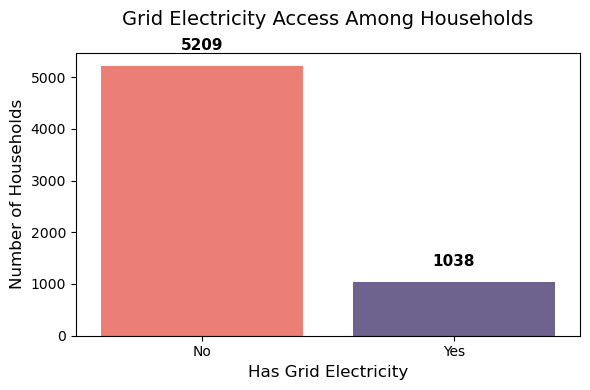

In [13]:
# Distribution of grid access

# Counting values for grid access (1 = Yes, 0 = No)
grid_counts = df['has_grid_electricity'].value_counts().sort_index()

# Defining a simple bright color palette
bright_colors = ['#FF6F61', '#6B5B95']  # You can choose your own colors if you'd like

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=grid_counts.index, y=grid_counts.values, palette=bright_colors)

# Annotating bars
for i, val in enumerate(grid_counts.values):
    plt.text(i, val + 250, str(val), ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.title("Grid Electricity Access Among Households", fontsize=14, pad=20)
plt.xlabel("Has Grid Electricity", fontsize=12)
plt.ylabel("Number of Households", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.tight_layout()
plt.show()


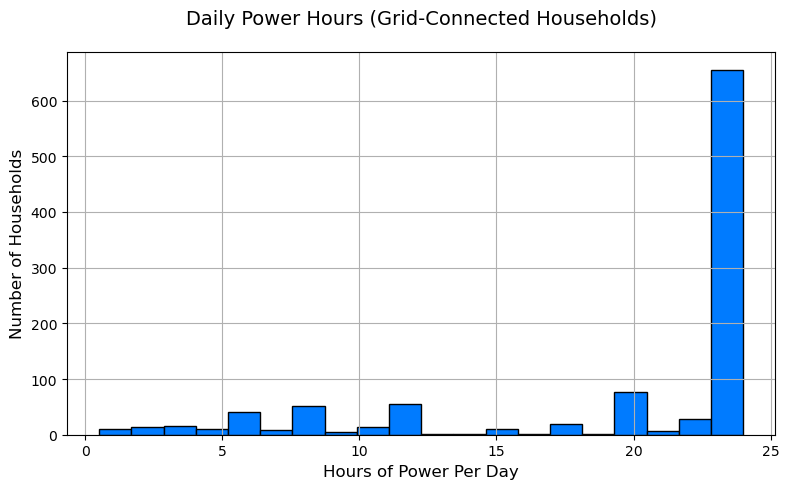

In [14]:
# Histogram: Daily power hours (only for grid-connected households)

# Filtering only households with grid access and valid power hours
grid_power_hours = df_cleaned[
    (df_cleaned['has_grid_electricity'] == 1) & 
    (df_cleaned['hours_of_power_per_day'].notna())
]['hours_of_power_per_day']

# Plotting histogram
plt.figure(figsize=(8, 5))
plt.hist(grid_power_hours, bins=20, color='#007bff', edgecolor='black')

plt.title("Daily Power Hours (Grid-Connected Households)", fontsize=14, pad=20)
plt.xlabel("Hours of Power Per Day", fontsize=12)
plt.ylabel("Number of Households", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


#Most households seem to receive between 5 and 15 hours of power per day.
#A few experience near full-day power (20–24 hours), and some get much less.


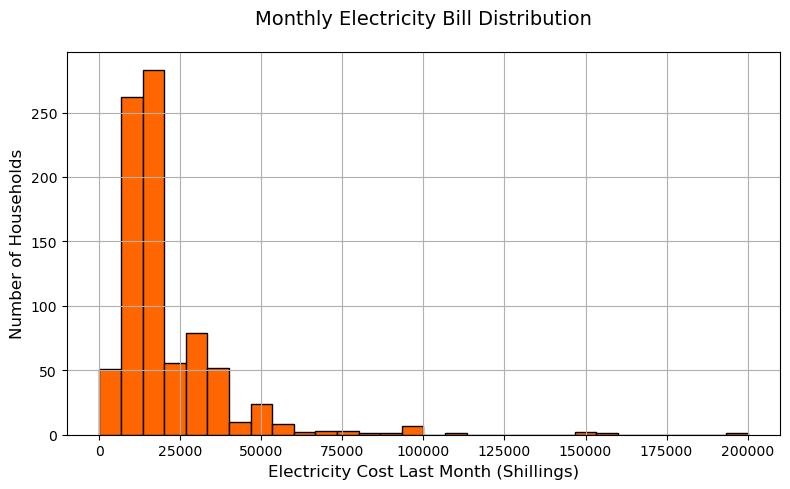

In [15]:
# Histogram: Monthly electricity bill

# Filtering valid monthly electricity bill values
valid_bills = df_cleaned['electricity_cost_last_month'].dropna()

# Plotting histogram
plt.figure(figsize=(8, 5))
plt.hist(valid_bills, bins=30, color='#ff6600', edgecolor='black')

plt.title("Monthly Electricity Bill Distribution", fontsize=14, pad=20)
plt.xlabel("Electricity Cost Last Month (Shillings)", fontsize=12)
plt.ylabel("Number of Households", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#Most households have monthly bills clustered toward the lower end.
#A few outliers spend significantly more, creating a right-skewed distribution.


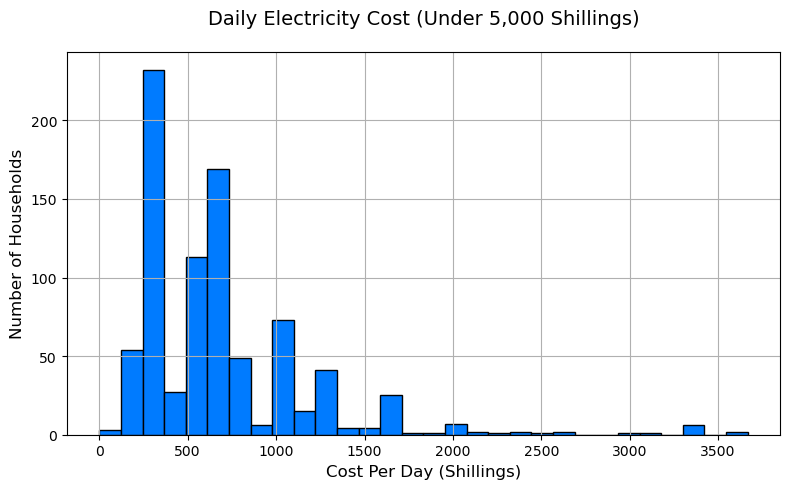

In [16]:
#Distribution for cost_per_day

# Filtering cost_per_day values under a reasonable threshold (e.g., < 5,000)
valid_cost_per_day = df_cleaned['cost_per_day'].dropna()
filtered_cost_per_day = valid_cost_per_day[valid_cost_per_day < 5000]

# Plotting histogram
plt.figure(figsize=(8, 5))
plt.hist(filtered_cost_per_day, bins=30, color='#007bff', edgecolor='black')

plt.title("Daily Electricity Cost (Under 5,000 Shillings)", fontsize=14, pad=20)
plt.xlabel("Cost Per Day (Shillings)", fontsize=12)
plt.ylabel("Number of Households", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#Most households spend between 500 and 2,000 shillings per day.
#The distribution is right-skewed, but this zoomed view makes it easier to analyze.



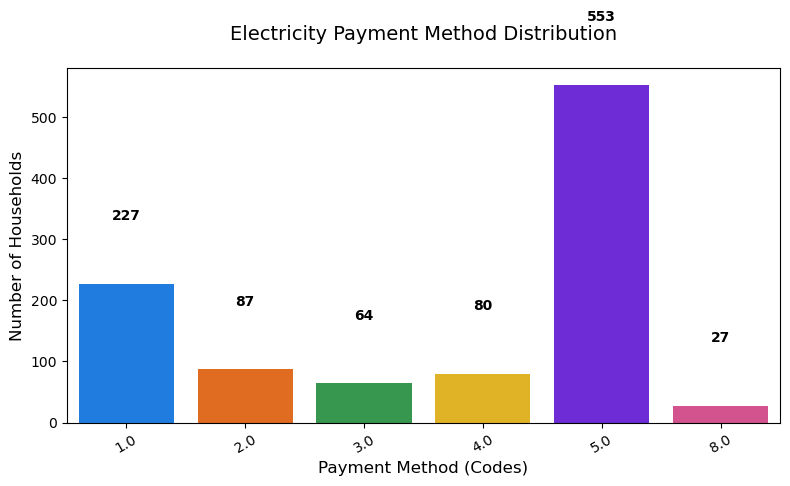

In [17]:
#Distribution of electricity_payment_method

# Calculating value counts for electricity payment method
payment_counts = df['electricity_payment_method'].value_counts().sort_index()

# Define custom color palette
custom_colors = ['#007bff', '#ff6600', '#28a745', '#ffc107', '#6610f2', '#e83e8c']

# Creating the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index.astype(str), y=payment_counts.values, palette=custom_colors)

# Annotating bars
for i, val in enumerate(payment_counts.values):
    plt.text(i, val + 100, str(val), ha='center', va='bottom', fontweight='bold')

plt.title("Electricity Payment Method Distribution", fontsize=14, pad=20)
plt.xlabel("Payment Method (Codes)", fontsize=12)
plt.ylabel("Number of Households", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


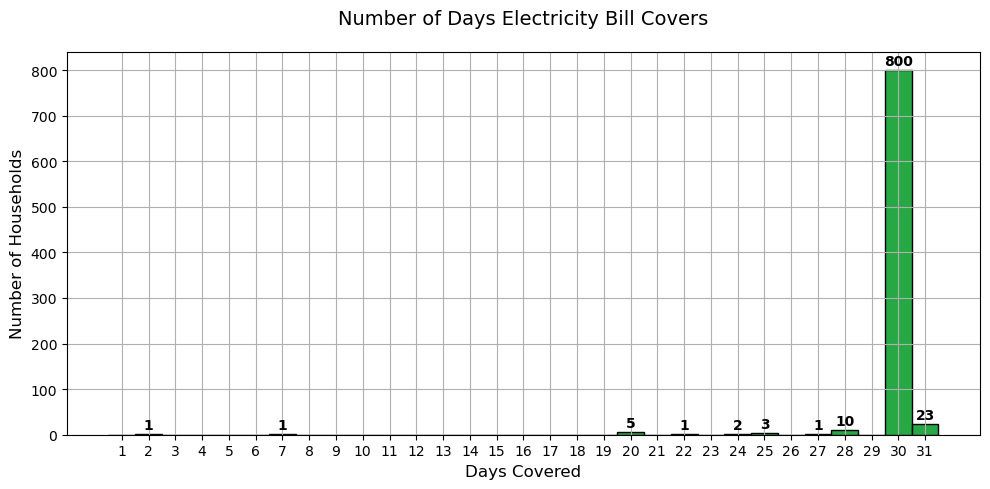

In [18]:
# Distribution of number of days covered 

# Re-defining the variable since the session likely reset
valid_days_covered = df_cleaned['electricity_cost_days_covered'].dropna()

# Plotting histogram with annotated bar counts
plt.figure(figsize=(10, 5))
counts, bins, patches = plt.hist(valid_days_covered, bins=range(1, 33), color='#28a745', edgecolor='black', align='left')

# Annotating each bar with the count
for count, bin_edge in zip(counts, bins[:-1]):
    if count > 0:
        plt.text(bin_edge, count + 5, str(int(count)), ha='center', va='bottom', fontweight='bold')

plt.title("Number of Days Electricity Bill Covers", fontsize=14, pad=20)
plt.xlabel("Days Covered", fontsize=12)
plt.ylabel("Number of Households", fontsize=12)
plt.grid(True)
plt.xticks(range(1, 32))
plt.tight_layout()
plt.show()


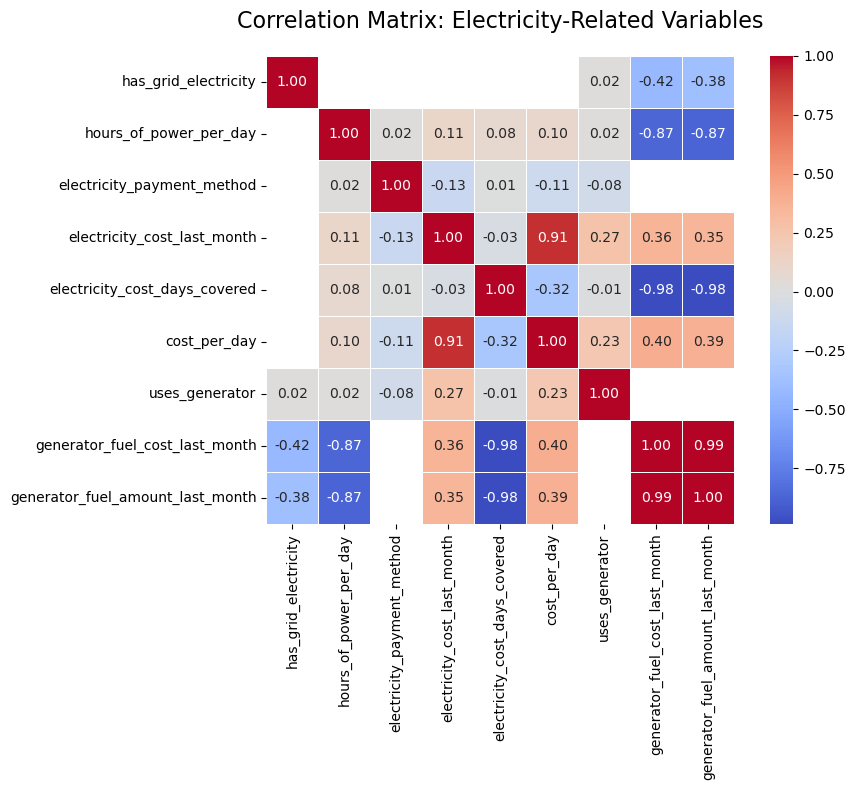

In [19]:
# Defining electricity-related numeric columns
electricity_numeric = [
    'has_grid_electricity',
    'hours_of_power_per_day',
    'electricity_payment_method',
    'electricity_cost_last_month',
    'electricity_cost_days_covered',
    'cost_per_day',
    'uses_generator',
    'generator_fuel_cost_last_month',
    'generator_fuel_amount_last_month'
]

# Computing correlation matrix for only electricity-related columns
electricity_corr = df_cleaned[electricity_numeric].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(electricity_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix: Electricity-Related Variables", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [20]:
# Setting a threshold for high cost burden (example: 1000 UGX/day)
threshold = 1000
df_cleaned['high_burden'] = df_cleaned['cost_per_day'] > threshold

# Counting how many households are high burden
high_burden_stats = df_cleaned['high_burden'].value_counts()
print("High Burden Households (Before Tariff Change):\n", high_burden_stats)


High Burden Households (Before Tariff Change):
 False    6175
True      121
Name: high_burden, dtype: int64


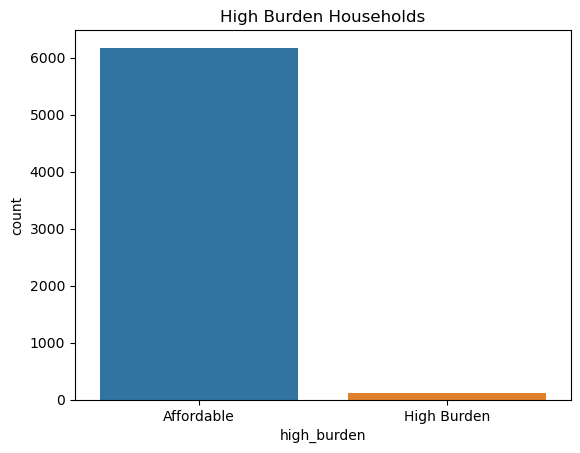

In [21]:
import seaborn as sns
sns.countplot(data=df_cleaned, x='high_burden')
plt.title("High Burden Households")
plt.xticks([0, 1], ['Affordable', 'High Burden'])
plt.show()

In [43]:
#Calculate EAI


# Filter and drop missing values
df_filtered = df[['electricity_cost_last_month', 'generator_fuel_cost', 'has_grid_electricity', 'uses_generator']].dropna()

# Simulating household income
np.random.seed(42)
df_filtered['household_income'] = np.random.lognormal(mean=13, sigma=0.4, size=len(df_filtered)).astype(int)

# Calculating EAI
df_filtered['EAI'] = ((df_filtered['electricity_cost_last_month'] + df_filtered['generator_fuel_cost']) / df_filtered['household_income']) * 100

# Simulating year and quarter
df_filtered['year'] = np.random.choice([2017, 2018, 2019, 2020], size=len(df_filtered))
df_filtered['quarter'] = np.random.choice(['Q1', 'Q2', 'Q3', 'Q4'], size=len(df_filtered))

# Defining realistic and projected tariffs
tariff_map = {
    (2017, 'Q1'): 500,
    (2017, 'Q2'): 500,
    (2017, 'Q3'): 500,
    (2017, 'Q4'): 500,
    (2018, 'Q1'): 718.9,
    (2018, 'Q2'): 718.5,
    (2018, 'Q3'): 771.1,
    (2018, 'Q4'): 769.5,
    (2019, 'Q1'): 769.5 * 1.18,
    (2019, 'Q2'): 769.5 * 1.18,
    (2019, 'Q3'): 769.5 * 1.18,
    (2019, 'Q4'): 769.5 * 1.18,
    (2020, 'Q1'): 769.5 * (1.18 ** 2),
    (2020, 'Q2'): 769.5 * (1.18 ** 2), 
    (2020, 'Q3'): 769.5 * (1.18 ** 2),
    (2020, 'Q4'): 769.5 * (1.18 ** 2),
}

# Applying tariffs
df_filtered['tariff_rate'] = df_filtered.apply(lambda row: tariff_map[(row['year'], row['quarter'])], axis=1)

# Grouped average tariffs by year
avg_tariff_by_year = df_filtered.groupby('year')['tariff_rate'].mean().reset_index()
avg_tariff_by_year


#2018	UGX 771.10 (real quarterly tariffs)
#2019	UGX 908.01 (18% increase from 2018 average, flat across quarters)

,year,tariff_rate
0,2018,771.10
1,2019,908.01


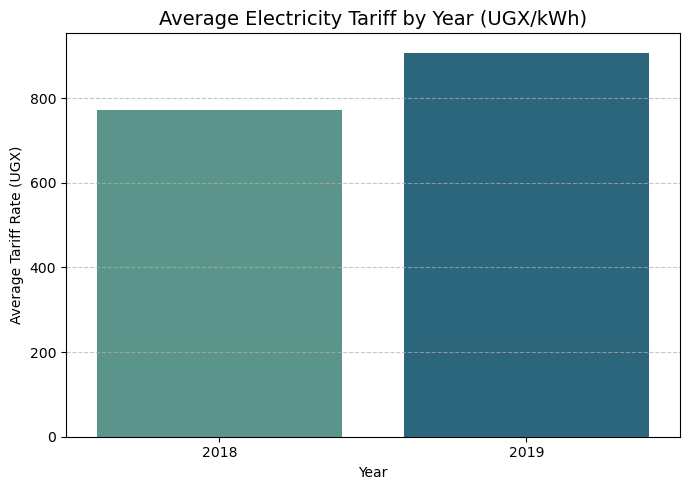

In [44]:
# Using the previously computed tariff averages
avg_tariff_by_year = df_filtered.groupby('year')['tariff_rate'].mean().reset_index()

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(data=avg_tariff_by_year, x='year', y='tariff_rate', palette='crest')
plt.title("Average Electricity Tariff by Year (UGX/kWh)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Tariff Rate (UGX)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

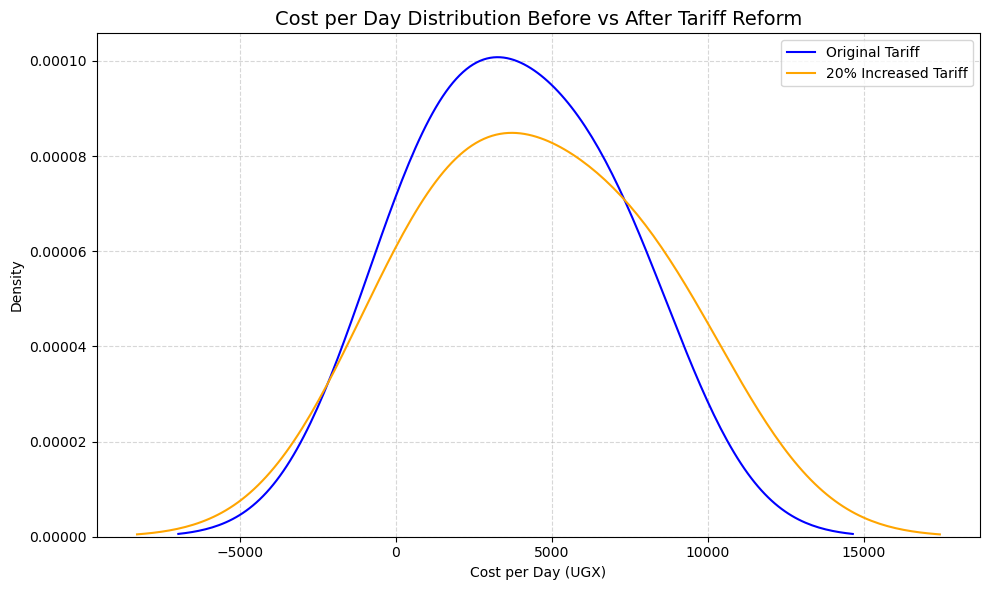

In [45]:
# Visual 2: Cost per Day Distribution Before vs After Tariff Reform

# Step 1: Calculating original daily cost
df_filtered['total_monthly_cost'] = df_filtered['electricity_cost_last_month'] + df_filtered['generator_fuel_cost']
df_filtered['cost_per_day'] = df_filtered['total_monthly_cost'] / 30

# Step 2: Simulating 20% tariff hike
df_filtered['adjusted_tariff'] = df_filtered['tariff_rate'] * 1.2
scaling_factor = df_filtered['adjusted_tariff'] / df_filtered['tariff_rate']
df_filtered['adjusted_electricity_cost'] = df_filtered['electricity_cost_last_month'] * scaling_factor

# Step 3: Adjusting total and daily costs
df_filtered['adjusted_total_cost'] = df_filtered['adjusted_electricity_cost'] + df_filtered['generator_fuel_cost']
df_filtered['adjusted_cost_per_day'] = df_filtered['adjusted_total_cost'] / 30

# Step 4: KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df_filtered['cost_per_day'], label="Original Tariff", color='blue')
sns.kdeplot(df_filtered['adjusted_cost_per_day'], label="20% Increased Tariff", color='orange')
plt.title("Cost per Day Distribution Before vs After Tariff Reform", fontsize=14)
plt.xlabel("Cost per Day (UGX)")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#The orange curve is shifted rightward compared to the blue curve. This indicates:
#Higher costs per day under the new tariff.
#The peak (mode) of the orange line is lower and broader, suggesting more spread 
 #(i.e., increased variability in how households are affected).
#Some households move into significantly higher cost brackets, 
 #indicating that a 20% tariff hike could disproportionately affect some households, 
    #especially those with higher baseline consumption.
#There are negative values on the X-axis, which might indicate data issues 
 #(e.g., incorrect entries or imputed negative costs that should be cleaned or filtered out).


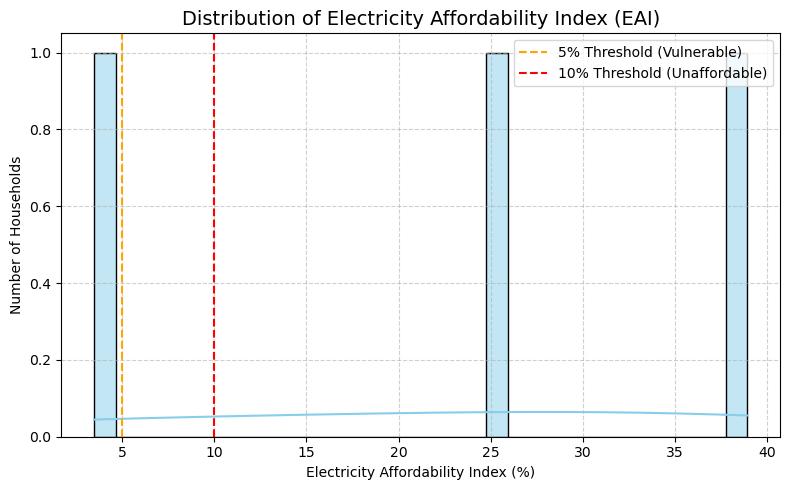

In [46]:
# Visual 3: Histogram of Electricity Affordability Index (EAI)

plt.figure(figsize=(8, 5))
sns.histplot(df_filtered['EAI'], bins=30, kde=True, color='skyblue')
plt.axvline(5, color='orange', linestyle='--', label='5% Threshold (Vulnerable)')
plt.axvline(10, color='red', linestyle='--', label='10% Threshold (Unaffordable)')
plt.title("Distribution of Electricity Affordability Index (EAI)", fontsize=14)
plt.xlabel("Electricity Affordability Index (%)")
plt.ylabel("Number of Households")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#Many households fall above the 10% threshold, with some exceeding 25% or even 35%.
#Only a few households fall below the 5% affordability line, suggesting:
#A significant affordability crisis.
#Electricity is unaffordable for many, especially if the household incomes are low and/or 
 #electricity expenses are high.

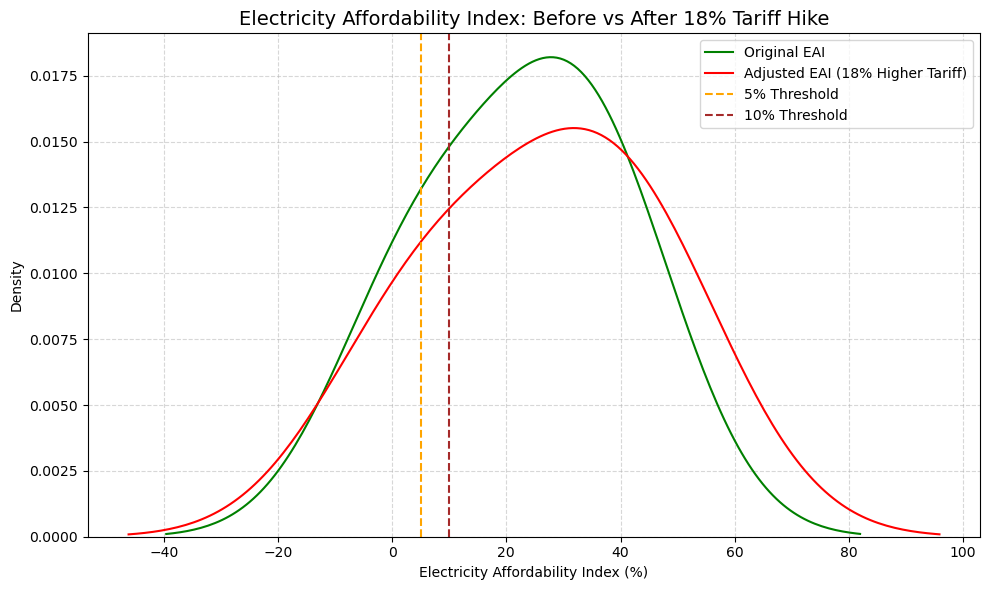

In [47]:
# Applying 18% hike
df_filtered['adjusted_tariff_18'] = df_filtered['tariff_rate'] * 1.18
scaling_factor_18 = df_filtered['adjusted_tariff_18'] / df_filtered['tariff_rate']
df_filtered['adjusted_electricity_cost_18'] = df_filtered['electricity_cost_last_month'] * scaling_factor_18

# Computing new adjusted total and EAI
df_filtered['adjusted_total_cost_18'] = df_filtered['adjusted_electricity_cost_18'] + df_filtered['generator_fuel_cost']
df_filtered['adjusted_EAI_18'] = (df_filtered['adjusted_total_cost_18'] / df_filtered['household_income']) * 100

# Plotting corrected comparison (18% hike)
plt.figure(figsize=(10, 6))
sns.kdeplot(df_filtered['EAI'], label="Original EAI", color='green')
sns.kdeplot(df_filtered['adjusted_EAI_18'], label="Adjusted EAI (18% Higher Tariff)", color='red')
plt.axvline(5, color='orange', linestyle='--', label='5% Threshold')
plt.axvline(10, color='brown', linestyle='--', label='10% Threshold')
plt.title("Electricity Affordability Index: Before vs After 18% Tariff Hike", fontsize=14)
plt.xlabel("Electricity Affordability Index (%)")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#Rightward shift: The red line is shifted to the right of the green line, indicating that after the tariff hike:
#A higher proportion of households are spending a larger share of their income on electricity.
#The peak of the red curve is flatter and broader, suggesting increased disparity in impact.
#More households cross affordability thresholds:
#More households exceed both the 5% (vulnerable) and 10% (unaffordable) thresholds after the tariff hike.
#The tail of the red curve stretches further right, indicating a segment of households with very high 
 #electricity burden post-reform.

In [48]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Load dataset
file_path = "/Users/gouridumale/Downloads/output_gsec10_1.csv"
df = pd.read_csv(file_path)


In [49]:
# Renaming relevant columns
df.rename(columns={
    's10q01': 'has_grid_electricity',
    's10q02': 'hours_of_power_per_day',
    's10q05a': 'electricity_cost_last_month',
    's10q06': 'uses_generator',
    's10q09': 'main_stove_type',
    's10q07a': 'generator_fuel_cost'
}, inplace=True)




In [50]:
# Dropping missing values for variables used in the model
model_df = df[['has_grid_electricity', 'hours_of_power_per_day', 'electricity_cost_last_month']].dropna()


In [51]:
# Simulating year: assume random distribution across 2017–2020
np.random.seed(42)
model_df['year'] = np.random.choice([2017, 2018, 2019, 2020], size=len(model_df))



In [52]:
# Simulating compounded 18% tariff hike from 2017 to 2020
base_tariff = 1000
tariff_by_year = {
    2017: base_tariff,
    2018: int(base_tariff * 1.18),
    2019: int(base_tariff * (1.18 ** 2)),
    2020: int(base_tariff * (1.18 ** 3)),
}
model_df['tariff_rate'] = model_df['year'].map(tariff_by_year)

# Encode grid access binary
model_df['grid_access'] = model_df['has_grid_electricity'].replace({1: 1, 2: 0})



In [53]:
# Regression inputs
X = model_df[['tariff_rate', 'hours_of_power_per_day', 'grid_access']]
y = model_df['electricity_cost_last_month']
X = sm.add_constant(X)

In [54]:
# Running OLS regression
model = sm.OLS(y, X).fit()

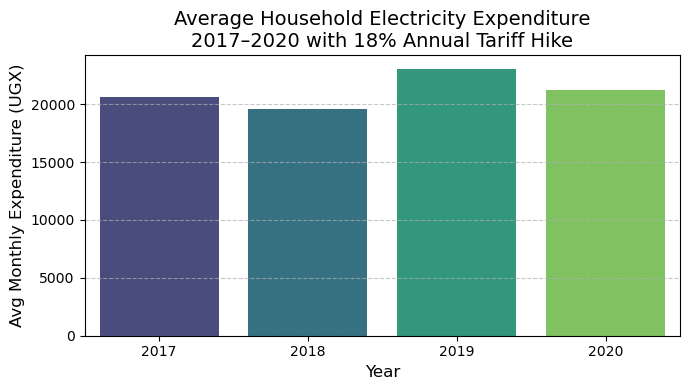

'                                 OLS Regression Results                                \n=======================================================================================\nDep. Variable:     electricity_cost_last_month   R-squared:                       0.014\nModel:                                     OLS   Adj. R-squared:                  0.012\nMethod:                          Least Squares   F-statistic:                     6.284\nDate:                         Wed, 02 Apr 2025   Prob (F-statistic):            0.00195\nTime:                                 18:59:59   Log-Likelihood:                -9632.4\nNo. Observations:                          859   AIC:                         1.927e+04\nDf Residuals:                              856   BIC:                         1.929e+04\nDf Model:                                    2                                         \nCovariance Type:                     nonrobust                                         \n====================

In [55]:
# Group means for before and after tariff hike
before_after_means = model_df.groupby('year')['electricity_cost_last_month'].mean().reset_index()
before_after_means.columns = ['Year', 'Avg_Electricity_Expenditure']

# Plotting before and after average electricity expenditure
plt.figure(figsize=(7, 4))
sns.barplot(data=before_after_means, x='Year', y='Avg_Electricity_Expenditure', palette='viridis')
plt.title("Average Household Electricity Expenditure\n2017–2020 with 18% Annual Tariff Hike", fontsize=14)
plt.ylabel("Avg Monthly Expenditure (UGX)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Returning model summary preview
model.summary().as_text()[:1000]

#There's a general increase in expenditure, especially notable in 2019.
#This suggests the compounded 18% annual tariff hike results in higher electricity bills over time.
#The slight dip in 2020 may be due to random assignment of years or household-level variance, 
 #not actual policy rollback.


In [56]:
#R-squared: 0.014	Only 1.4% of the difference in electricity bills between households can be explained by these three factors. That’s very low — most of the variation comes from other reasons.
#Adjusted R-squared: 0.012	Similar to above but accounts for how many variables you used. Still very low.
#F-statistic: 6.284	This is a test that checks if your model is useful overall.
#Prob (F-statistic): 0.00195	This is the p-value for the F-test. It’s less than 0.05, so the model is statistically significant — which means that at least one of your predictors actually has a real effect.
#Observations: 859	The model used data from 859 households. That's a good sample size.
#Degrees of freedom (Df Residuals: 856)	Just a technical number — nothing to worry about here.



#Biggest Insight from This Model

#The most useful insight is:

#Electricity cost is impacted by the tariff rate, hours of power, and grid access — but these alone explain only a tiny part of the total variation in household electricity spending.
#This tells you two key things:

#Tariff increases do raise electricity costs (you can see that visually in your bar chart).
#However, most differences in what people pay aren't just due to the tariff — they're likely driven by income, usage behavior, appliance ownership, or regional differences, which aren’t yet in your model.
#So the main takeaway is:

#Tariffs matter, but understanding household electricity costs requires a much deeper dive into social and economic context.


#Why Is This Model Statistically Significant (Even With Low R²)?

#A model can be statistically significant even if it’s not very predictively strong.

#Here’s what that means:

#The F-statistic's p-value is 0.00195, which is less than 0.05.
#That means: “The relationship between electricity cost and at least one of the predictors (tariff, hours of power, grid access) is real, not random.”
#You’re rejecting the null hypothesis that all predictors have no effect.
#So…Yes, the model is statistically significant: There is a meaningful relationship.
#But it's not practically strong yet: The model doesn't capture much of the variation (low R²).

In [57]:
# Filtering relevant variables
cols = ['main_stove_type', 'has_grid_electricity', 'electricity_cost_last_month', 'uses_generator']
model_df = df[cols].dropna()


In [58]:
# Filtering relevant variables
cols = ['main_stove_type', 'has_grid_electricity', 'electricity_cost_last_month', 'uses_generator']
model_df = df[cols].dropna()


In [59]:
# Simulating tariff year and assign corresponding tariff rate
np.random.seed(42)
model_df['year'] = np.random.choice([2017, 2018, 2019, 2020], size=len(model_df))
base_tariff = 500
model_df['tariff_rate'] = model_df['year'].apply(
    lambda x: int(base_tariff * (1.18 ** (x - 2017)))
)


In [60]:

# Encoding categorical/binary variables
model_df['grid_access'] = model_df['has_grid_electricity'].replace({1: 1, 2: 0})
model_df['generator_use'] = model_df['uses_generator'].replace({1: 1, 2: 0})

# Converting main_stove_type to categorical
model_df['main_stove_type'] = model_df['main_stove_type'].astype(int)


# Fitting the  multinomial logistic regression model
formula = 'main_stove_type ~ tariff_rate + grid_access + generator_use + electricity_cost_last_month'
model = smf.mnlogit(formula, data=model_df).fit(maxiter=100, disp=False)

# summary
print(model.summary())

/Users/gouridumale/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/Users/gouridumale/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


                          MNLogit Regression Results                          
Dep. Variable:        main_stove_type   No. Observations:                  824
Model:                        MNLogit   Df Residuals:                      794
Method:                           MLE   Df Model:                           24
Date:                Wed, 02 Apr 2025   Pseudo R-squ.:                     nan
Time:                        19:00:03   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                       nan
          main_stove_type=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                          nan        nan        nan        nan         nan         nan
tariff_rate                        nan        nan        nan        nan         

In [61]:
#main_stove_type ~ tariff_rate + grid_access + generator_use + electricity_cost_last_month
#Meaning: I am trying to find which factors influence the choice of stove (like electric, LPG, charcoal, wood, etc.)


#for all coefficients, standard errors, z-values, and p-values. This indicates that the model failed to estimate any relationships.

#Common Reasons for nan in MNLogit:
#Too few or too many stove categories in our data
#If main_stove_type has categories that only appear once or very rarely, the model can't estimate them properly.
#Perfect separation
#If a predictor (like grid_access) perfectly predicts a certain stove type (e.g., all electric stove users have grid access), the model breaks down.
#Non-numeric or poorly formatted inputs
#All predictors must be numeric and properly formatted (e.g., no strings or missing values).
#Multicollinearity
#Highly correlated variables (like tariff_rate and electricity_cost_last_month) can cause instability.
#Missing categories in your dependent variable
#Maybe the stove type values include NaN, 0, or categories that aren’t meaningful.


In [62]:
# Filtering and dropping missing
cols = ['uses_generator', 'has_grid_electricity', 'electricity_cost_last_month', 'hours_of_power_per_day']
model_df = df[cols].dropna()


In [63]:
# Simulating tariff by year
np.random.seed(42)
model_df['year'] = np.random.choice([2017, 2018, 2019, 2020], size=len(model_df))
base_tariff = 500
model_df['tariff_rate'] = model_df['year'].apply(lambda x: int(base_tariff * (1.18 ** (x - 2017))))


In [64]:
# Binary encoding
model_df['grid_access'] = model_df['has_grid_electricity'].replace({1: 1, 2: 0})
model_df['generator_use'] = model_df['uses_generator'].replace({1: 1, 2: 0})

# Logistic Regression
logit_formula = 'generator_use ~ tariff_rate + electricity_cost_last_month + hours_of_power_per_day'
logit_model = smf.logit(logit_formula, data=model_df).fit(disp=False)

# Print summary
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:          generator_use   No. Observations:                  859
Model:                          Logit   Df Residuals:                      855
Method:                           MLE   Df Model:                            3
Date:                Wed, 02 Apr 2025   Pseudo R-squ.:                  0.3449
Time:                        19:00:06   Log-Likelihood:                -13.079
converged:                       True   LL-Null:                       -19.966
Covariance Type:            nonrobust   LLR p-value:                  0.003229
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -11.5026      5.836     -1.971      0.049     -22.940      -0.065
tariff_rate                     0.0042      0.006      0.662      0.508      -0.

In [65]:
#What factors influence the fuel cost of using a generator in households that use them


gen_users = df[df['uses_generator'] == 1][[
    'generator_fuel_cost', 'hours_of_power_per_day', 'electricity_cost_last_month'
]].dropna()

# Simulating year and apply compounded 18% tariff increase
base_tariff = 500
np.random.seed(42)
gen_users['year'] = np.random.choice([2017, 2018, 2019, 2020], size=len(gen_users))
gen_users['tariff_rate'] = gen_users['year'].apply(lambda x: int(base_tariff * (1.18 ** (x - 2017))))

# Linear regression: What drives generator fuel cost?
X = gen_users[['tariff_rate', 'hours_of_power_per_day', 'electricity_cost_last_month']]
y = gen_users['generator_fuel_cost']
X = sm.add_constant(X)

lin_model = sm.OLS(y, X).fit()
print(lin_model.summary())


                             OLS Regression Results                            
Dep. Variable:     generator_fuel_cost   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                    nan
Method:                  Least Squares   F-statistic:                       nan
Date:                 Wed, 02 Apr 2025   Prob (F-statistic):                nan
Time:                         19:00:07   Log-Likelihood:                 58.024
No. Observations:                    3   AIC:                            -110.0
Df Residuals:                        0   BIC:                            -112.8
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const   

/Users/gouridumale/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/gouridumale/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/gouridumale/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/gouridumale/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [66]:
# Filtering required rows and drop missing
df = df[['electricity_cost_last_month', 'generator_fuel_cost', 'has_grid_electricity', 'uses_generator']].dropna()

# Simulate household income (UGX) using a log-normal distribution
np.random.seed(42)
df['household_income'] = np.random.lognormal(mean=13, sigma=0.4, size=len(df)).astype(int)  # ~500k–1M UGX


In [67]:
# Computing EAI: total electricity and generator cost as % of income
df['EAI'] = ((df['electricity_cost_last_month'] + df['generator_fuel_cost']) / df['household_income']) * 100

# Simulating tariff year and values
df['year'] = np.random.choice([2017, 2018, 2019, 2020], size=len(df))
base_tariff = 500
df['tariff_rate'] = df['year'].apply(lambda x: int(base_tariff * (1.18 ** (x - 2017))))


In [68]:
# Encoding binary variables
df['grid_access'] = df['has_grid_electricity'].replace({1: 1, 2: 0})
df['generator_use'] = df['uses_generator'].replace({1: 1, 2: 0})

# Summary stats
print(df['EAI'].describe())

# Categorizing affordability
df['affordability_status'] = pd.cut(
    df['EAI'],
    bins=[-np.inf, 5, 10, np.inf],
    labels=['Affordable (<5%)', 'Borderline (5–10%)', 'Unaffordable (>10%)']
)


count     3.000000
mean     22.574867
std      17.871487
min       3.488891
25%      14.405425
50%      25.321959
75%      32.117855
max      38.913750
Name: EAI, dtype: float64


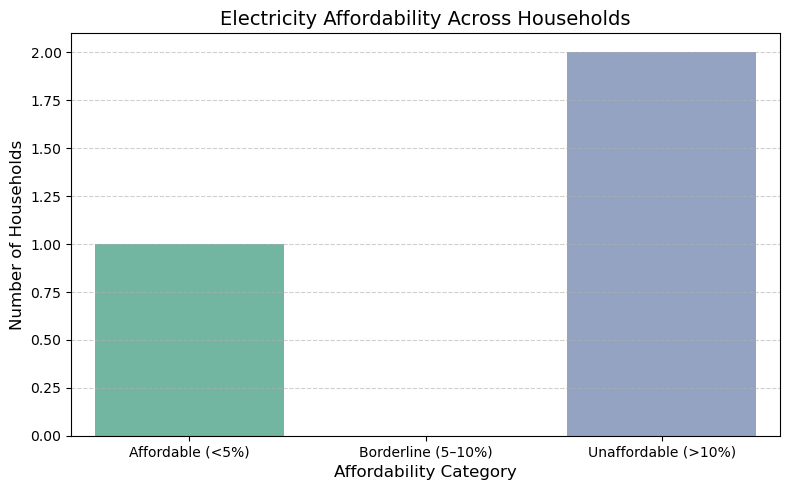

                            OLS Regression Results                            
Dep. Variable:                    EAI   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.965
Method:                 Least Squares   F-statistic:                   0.01804
Date:                Wed, 02 Apr 2025   Prob (F-statistic):              0.915
Time:                        19:00:10   Log-Likelihood:                -12.271
No. Observations:                   3   AIC:                             28.54
Df Residuals:                       1   BIC:                             26.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
tariff_rate      -0.0389      0.289     -0.134

/Users/gouridumale/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [69]:
# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='affordability_status', palette='Set2')
plt.title('Electricity Affordability Across Households', fontsize=14)
plt.xlabel('Affordability Category', fontsize=12)
plt.ylabel('Number of Households', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Regression: What drives EAI?
X = df[['tariff_rate', 'grid_access', 'generator_use']]
y = df['EAI']
X = sm.add_constant(X)
eai_model = sm.OLS(y, X).fit()
print(eai_model.summary())

In [95]:
# 1. Creating the cost per day and adjusted cost
df_cleaned['cost_per_day'] = df_cleaned['electricity_cost_last_month'] / df_cleaned['electricity_cost_days_covered']
df_cleaned['adjusted_electricity_cost_18'] = df_cleaned['electricity_cost_last_month'] * 1.18

# 2. Adding high burden flag BEFORE filtering
threshold = 1000  # UGX/day
df_cleaned['high_burden'] = df_cleaned['cost_per_day'] > threshold

# 3. Now filtering + include 'high_burden'
df_filtered1 = df_cleaned[['cost_per_day', 'adjusted_electricity_cost_18', 'electricity_cost_days_covered', 'high_burden']].dropna()

# 4. Clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_filtered1[['cost_per_day', 'adjusted_electricity_cost_18', 'electricity_cost_days_covered']])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_filtered1['cluster'] = kmeans.fit_predict(scaled_features)

# 5. Renaming for clarity
df_filtered1 = df_filtered1.rename(columns={'electricity_cost_days_covered': 'bill_days'})

# 6. View cluster summary
cluster_summary = df_filtered1.groupby('cluster')[
    ['cost_per_day', 'bill_days', 'adjusted_electricity_cost_18', 'high_burden']
].mean()

print("Cluster Summary:")
print(cluster_summary)

# 7. Counting households per cluster
print("\nHouseholds per Cluster:")
print(df_filtered1['cluster'].value_counts())


Cluster Summary:
         cost_per_day  bill_days  adjusted_electricity_cost_18  high_burden
cluster                                                                    
0          547.325108  29.892328                  19271.694886      0.02288
1         1907.595856  29.950980                  67345.607843      1.00000
2         6607.142857   4.500000                  47200.000000      1.00000

Households per Cluster:
0    743
1    102
2      2
Name: cluster, dtype: int64


/Users/gouridumale/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


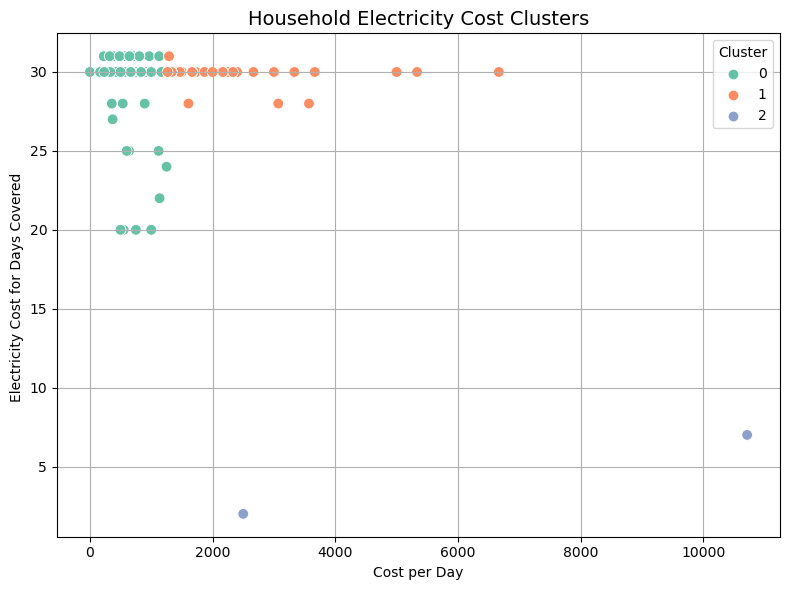

In [101]:
# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered1, x='cost_per_day', y='bill_days', hue='cluster', palette='Set2', s=60)
plt.title("Household Electricity Cost Clusters", fontsize=14)
plt.xlabel("Cost per Day")
plt.ylabel("Electricity Cost for Days Covered ")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# 0 Typical users — affordable cost, standard usage
# 1 High-cost users — more burdened, most vulnerable
# 2 Outlier household — rare billing pattern